In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx

from biological_fuzzy_logic_networks.utils import read_sif
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
work_dir = "/dccstor/ipc1/CAR/DREAM/Model/Test/Loops/"

In [3]:
success_runs = []
outputs = []
for i in range(15):
    if "loop_states.csv" in os.listdir(f"{work_dir}{i}"):
        success_runs.append(i)
        states = pd.read_csv(f"{work_dir}{i}/loop_states.csv", index_col=0)
        outputs.append(states)

In [4]:
states

,time,SERUM,NFkB,PLCg2,FAK,PI3K,BTK,PIP3,AKT_S473,p53,...,JNK,MAP3Ks,PAK,STAT5,PTEN,EGF,MEK12,STAT1,STAT3,p70S6K
0,0,1.0,0.580649,0.296647,0.705751,0.696734,0.501104,0.575444,0.447746,0.378965,...,0.042164,0.375668,0.882785,0.670907,0.701480,1.0,0.525250,0.763486,0.788870,0.204818
1,0,1.0,0.651483,0.542408,0.146116,0.798272,0.784464,0.252473,0.810939,0.173910,...,0.450295,0.428898,0.483340,0.345098,0.863506,1.0,0.526018,0.419872,0.219139,0.791129
2,0,1.0,0.604587,0.128750,0.339314,0.147828,0.781181,0.667370,0.876776,0.390395,...,0.811768,0.420526,0.591727,0.765477,0.114485,1.0,0.553326,0.019958,0.539644,0.474376
3,0,1.0,0.747720,0.826226,0.195863,0.219689,0.056239,0.147333,0.317586,0.922613,...,0.127345,0.074794,0.976998,0.573753,0.513811,1.0,0.667711,0.931938,0.631737,0.017829
4,0,1.0,0.450460,0.513195,0.951237,0.155799,0.317657,0.469429,0.351186,0.722555,...,0.059497,0.163330,0.421251,0.410323,0.172309,1.0,0.493458,0.610369,0.470210,0.703198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,167,1.0,0.682374,0.559379,0.564999,0.723383,0.657948,0.643920,0.575483,0.391363,...,0.613280,0.362316,0.965592,0.487126,0.040138,1.0,0.074396,0.423958,0.330967,0.452791
98,167,1.0,0.651112,0.413094,0.563113,0.072337,0.285741,0.013021,0.464247,0.347428,...,0.571759,0.032989,0.965216,0.293516,0.061714,1.0,0.485474,0.409804,0.319227,0.468615
99,167,1.0,0.682515,0.559375,0.564999,0.723367,0.657940,0.643904,0.575478,0.391898,...,0.588717,0.362308,0.965592,0.487121,0.040139,1.0,0.711132,0.424135,0.330966,0.452791
100,167,1.0,0.682515,0.559375,0.564999,0.723367,0.657940,0.643904,0.575478,0.391898,...,0.588717,0.362308,0.965592,0.487121,0.040139,1.0,0.711132,0.424135,0.330966,0.452791


In [5]:
nodes, edges = read_sif("/dccstor/ipc1/CAR/DREAM/DREAMdata/PKN_Alice.sif")
model = DREAMBioFuzzNet(nodes, edges)

In [6]:
nx.recursive_simple_cycles(model)

[['PLCg2',
  'PKC',
  'or14',
  'GSK3B',
  'PTEN',
  'not4',
  'PTEN_and_PI3K',
  'PIP3',
  'PDPK1',
  'or34',
  'MEK12_S221',
  'MEK12',
  'or16',
  'ERK12',
  'ERKdm2',
  'not3',
  'EGFR_and_ERKdm2',
  'RAS',
  'or8',
  'or9',
  'PI3K',
  'or10',
  'BTK',
  'or4',
  'or5',
  'or6'],
 ['PLCg2',
  'PKC',
  'or14',
  'GSK3B',
  'PTEN',
  'not4',
  'PTEN_and_PI3K',
  'PIP3',
  'PDPK1',
  'or34',
  'MEK12_S221',
  'MEK12',
  'or16',
  'ERK12',
  'ERKdm2',
  'not3',
  'EGFR_and_ERKdm2',
  'RAS',
  'or8',
  'or9',
  'PI3K',
  'or32',
  'SRC',
  'or5',
  'or6'],
 ['PLCg2',
  'PKC',
  'or14',
  'GSK3B',
  'PTEN',
  'not4',
  'PTEN_and_PI3K',
  'PIP3',
  'PDPK1',
  'or34',
  'MEK12_S221',
  'MEK12',
  'or16',
  'ERK12',
  'ERKdm2',
  'not3',
  'EGFR_and_ERKdm2',
  'RAS',
  'or8',
  'or9',
  'PI3K',
  'or32',
  'SRC',
  'or10',
  'BTK',
  'or4',
  'or5',
  'or6'],
 ['FAK',
  'or16',
  'ERK12',
  'ERKdm2',
  'not3',
  'EGFR_and_ERKdm2',
  'RAS',
  'or8',
  'or9',
  'PI3K',
  'or32',
  'SRC',
  '

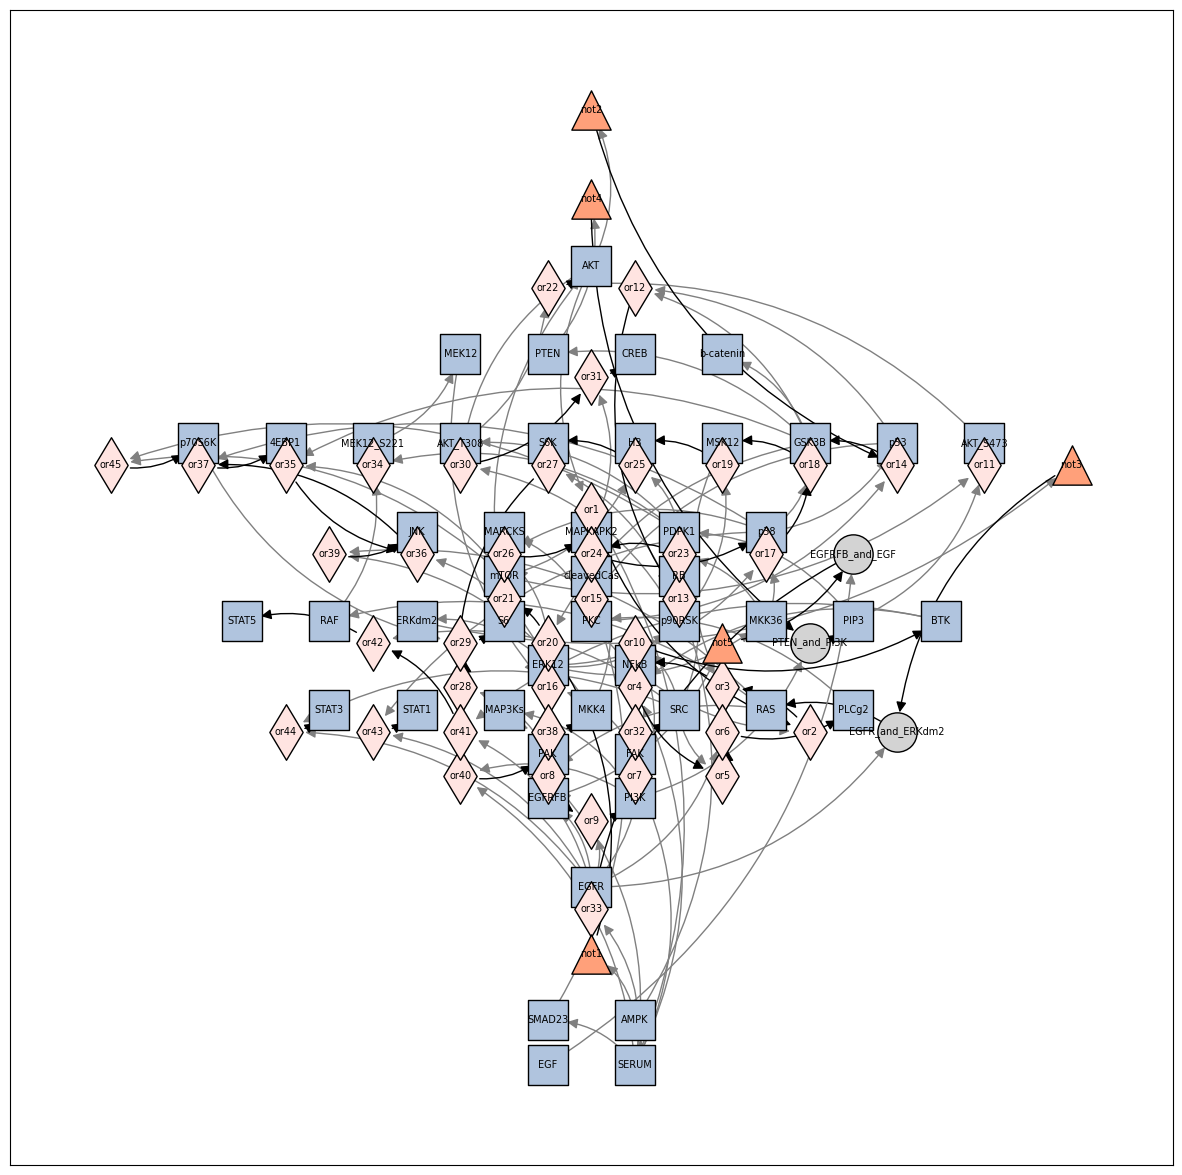

In [7]:
p = draw_BioFuzzNet(model)

In [8]:
loop_nodes = list(set([item for sublist in nx.recursive_simple_cycles(model) for item in sublist if item in states.columns]))

In [9]:
states[["time"]+loop_nodes]

,time,EGFRFB,PTEN,FAK,PLCg2,RAF,AKT_S473,PI3K,MEK12,MEK12_S221,...,ERKdm2,AKT_T308,BTK,GSK3B,RAS,AKT,SRC,EGFR,PDPK1,PIP3
0,0,0.773640,0.701480,0.705751,0.296647,0.789729,0.447746,0.696734,0.525250,0.696481,...,0.399996,9.748390e-01,0.501104,0.592743,0.079375,0.521145,0.094026,0.014382,0.702583,0.575444
1,0,0.326230,0.863506,0.146116,0.542408,0.738942,0.810939,0.798272,0.526018,0.668739,...,0.883451,8.483605e-01,0.784464,0.530434,0.084161,0.269816,0.707680,0.564724,0.030339,0.252473
2,0,0.085871,0.114485,0.339314,0.128750,0.567955,0.876776,0.147828,0.553326,0.973341,...,0.818432,1.367443e-01,0.781181,0.453862,0.179803,0.462585,0.636546,0.283493,0.893087,0.667370
3,0,0.831627,0.513811,0.195863,0.826226,0.672538,0.317586,0.219689,0.667711,0.219473,...,0.827778,5.640810e-01,0.056239,0.022055,0.171790,0.579698,0.882972,0.532847,0.084898,0.147333
4,0,0.556543,0.172309,0.951237,0.513195,0.760162,0.351186,0.155799,0.493458,0.023516,...,0.501888,5.705997e-01,0.317657,0.364562,0.642580,0.462305,0.200779,0.678089,0.611311,0.469429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,167,0.354317,0.040138,0.564999,0.559379,0.623022,0.575483,0.723383,0.074396,0.788231,...,0.074649,5.329375e-01,0.657948,0.585942,0.627578,0.579757,0.484602,0.634208,0.538640,0.643920
98,167,0.354317,0.061714,0.563113,0.413094,0.593050,0.464247,0.072337,0.485474,0.532786,...,0.149805,8.189303e-11,0.285741,0.712651,0.598033,0.460674,0.274604,0.634208,0.000016,0.013021
99,167,0.354317,0.040139,0.564999,0.559375,0.555515,0.575478,0.723367,0.711132,0.755757,...,0.201778,5.329188e-01,0.657940,0.585947,0.561121,0.579751,0.484597,0.634208,0.538621,0.643904
100,167,0.354317,0.040139,0.564999,0.559375,0.555515,0.575478,0.723367,0.711132,0.755757,...,0.201778,5.329188e-01,0.657940,0.585947,0.561121,0.579751,0.484597,0.634208,0.538621,0.643904


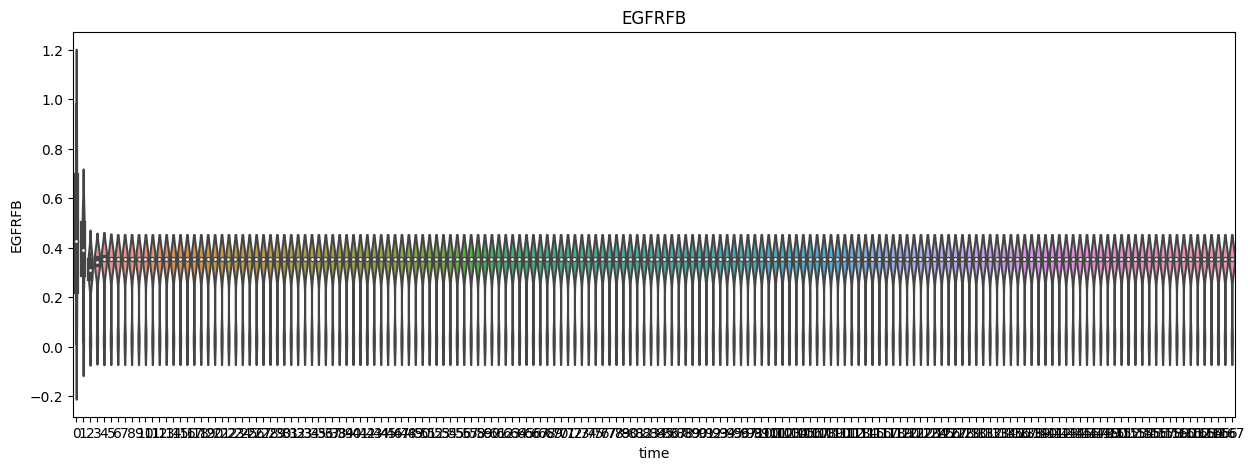

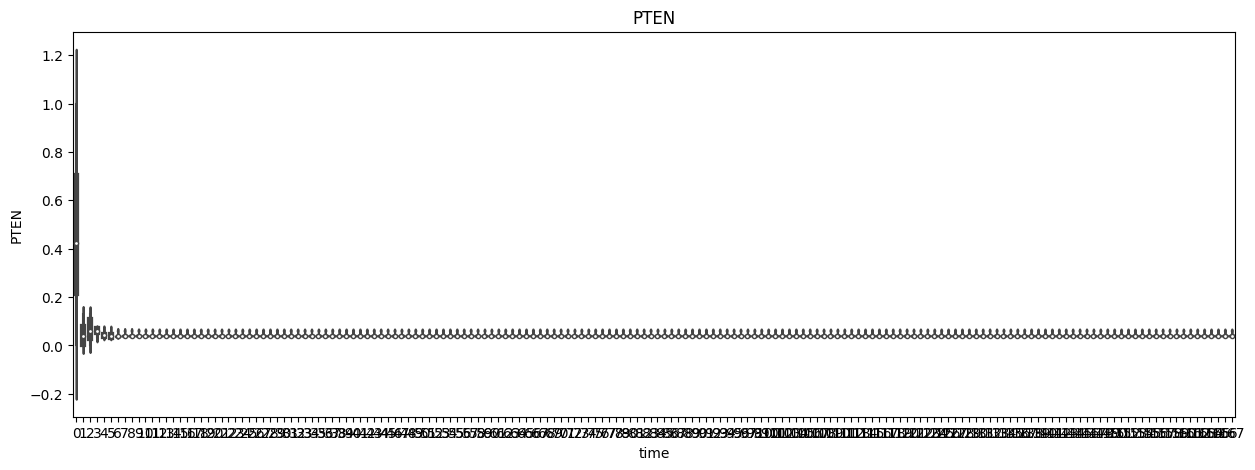

In [ ]:
for node in loop_nodes:
    plt.figure(figsize=(15,5))
    sns.violinplot(states[["time"]+loop_nodes], x="time", y=node)
    plt.title(node)
    plt.show()

In [10]:
all_loop_states = pd.concat(outputs, 
          keys=success_runs, 
          names=["param_setting", ""]).reset_index("param_setting", drop=False).reset_index(drop=True)

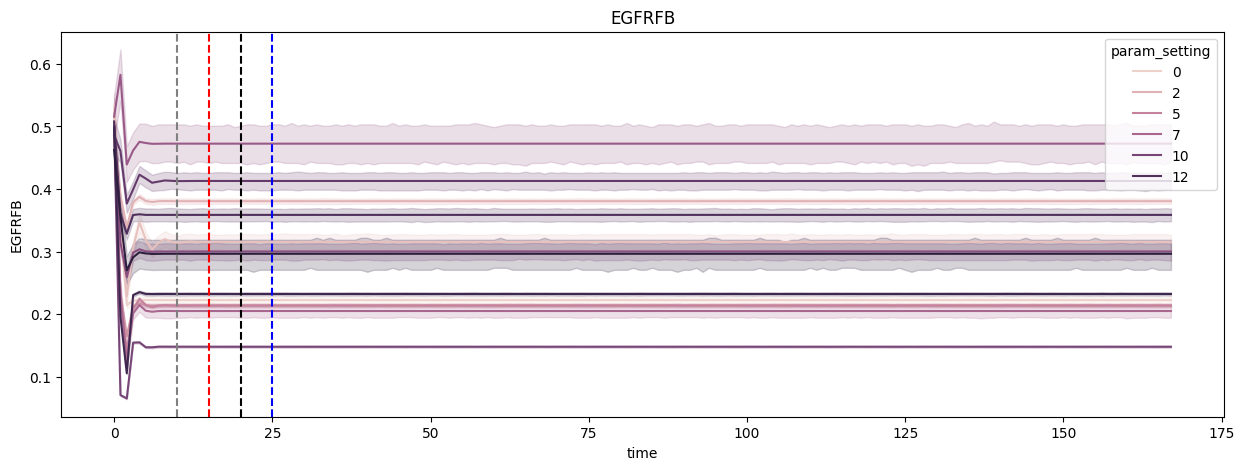

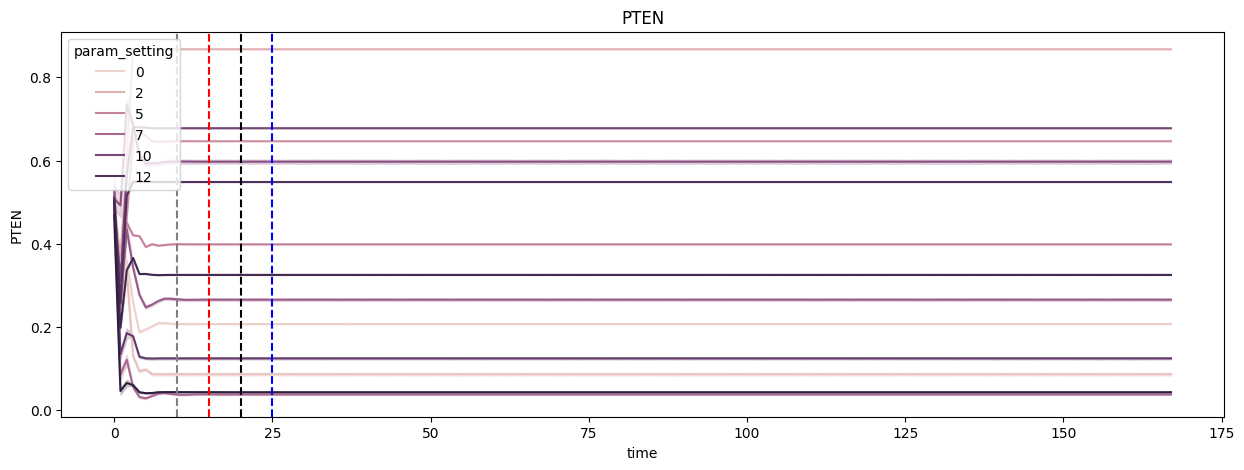

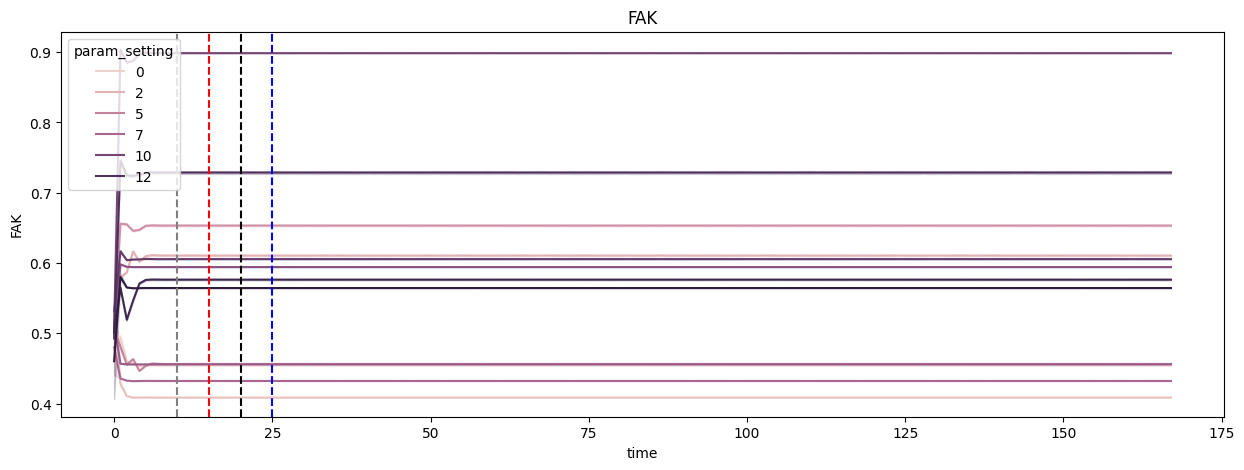

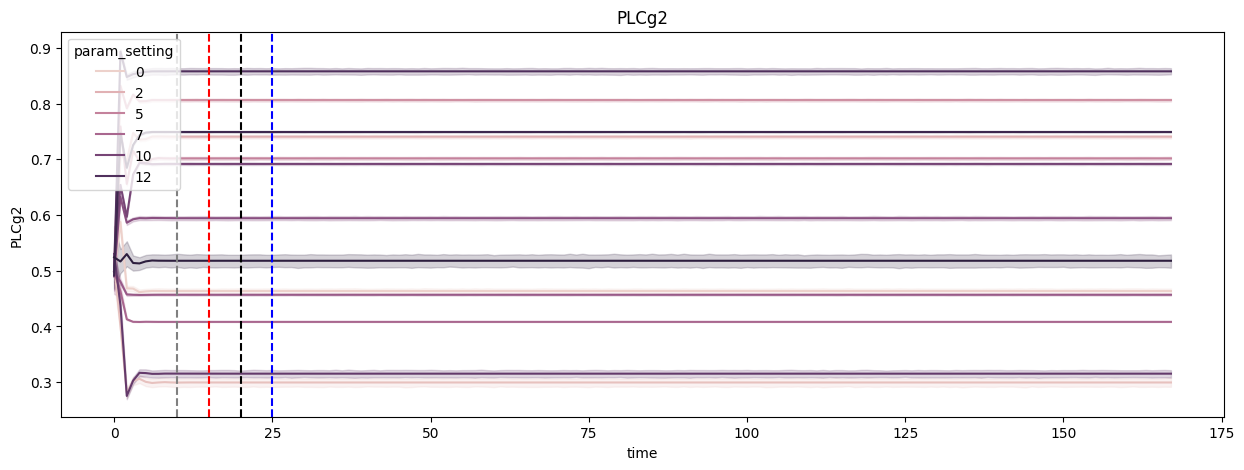

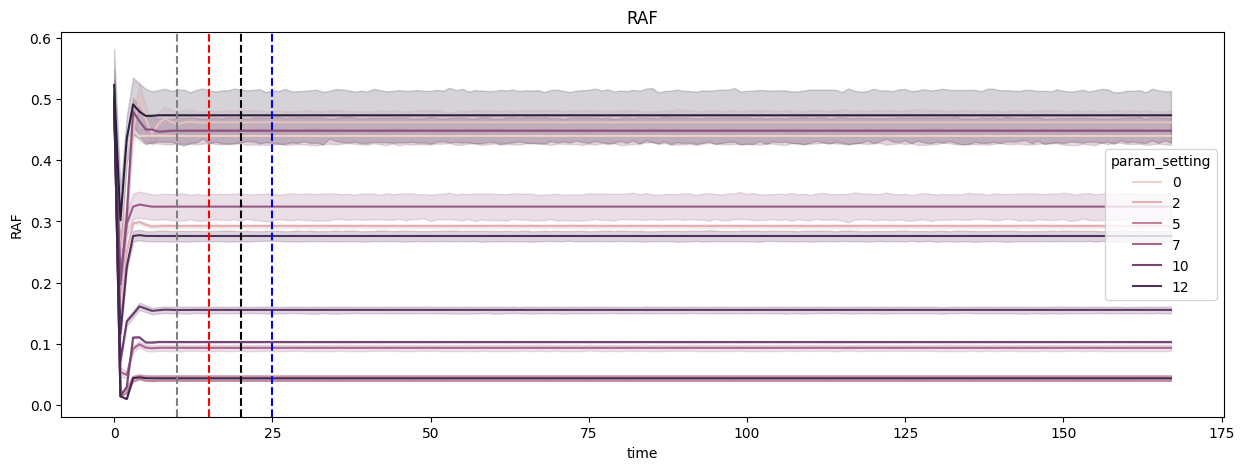

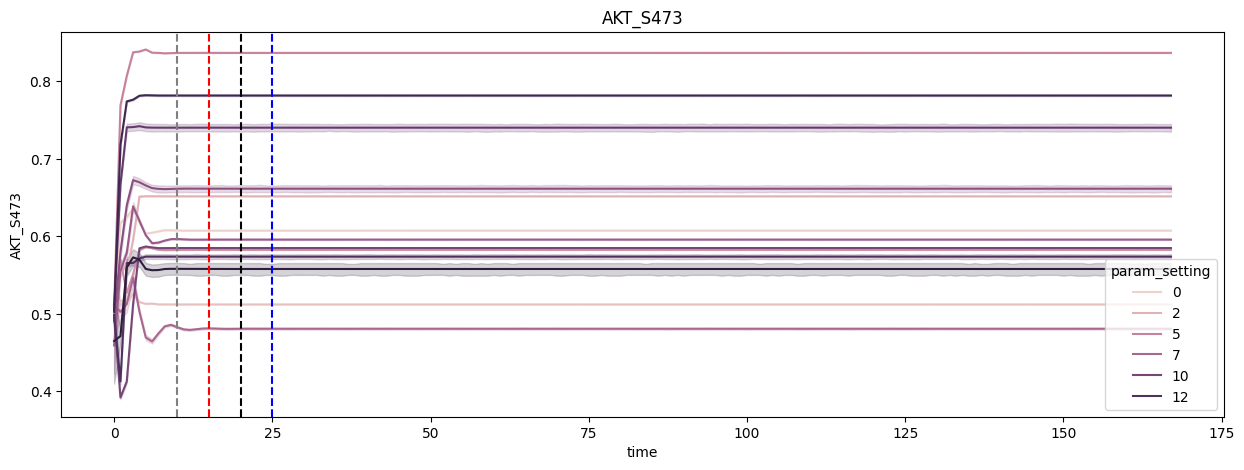

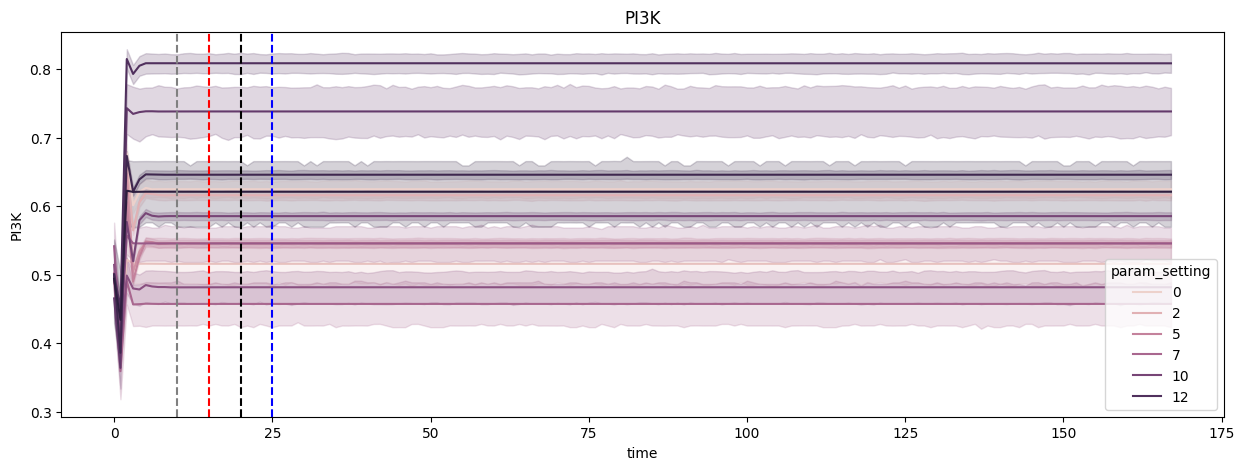

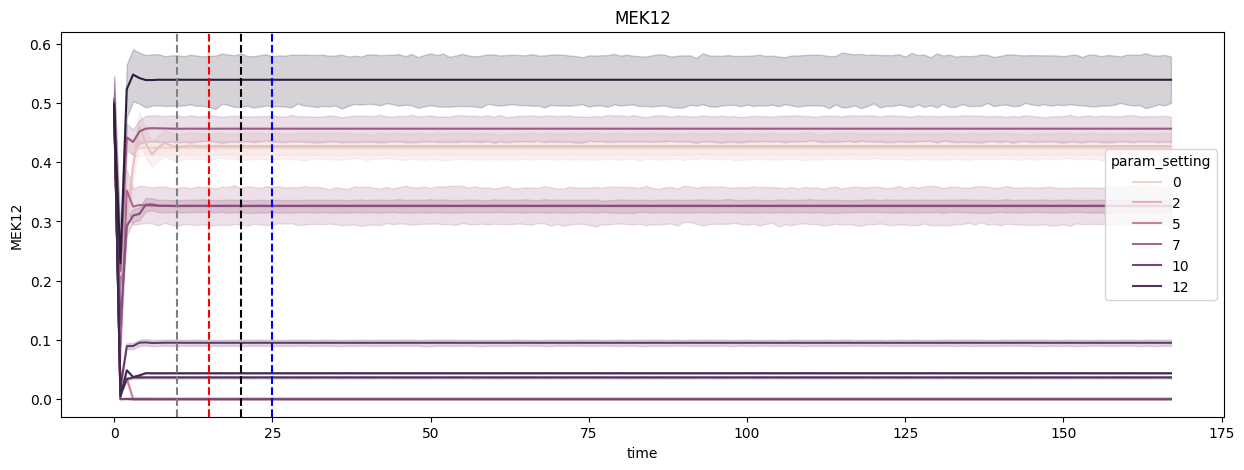

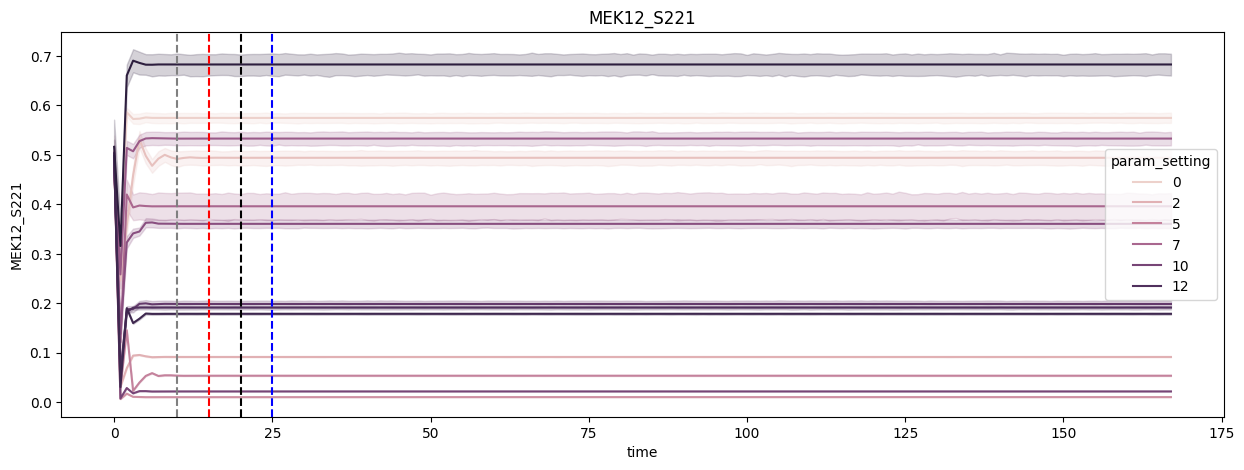

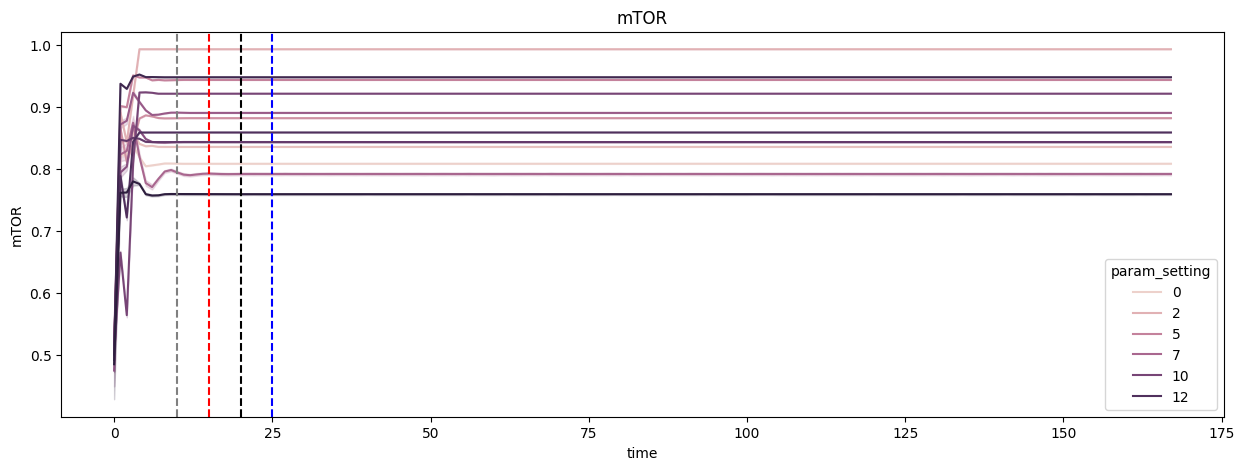

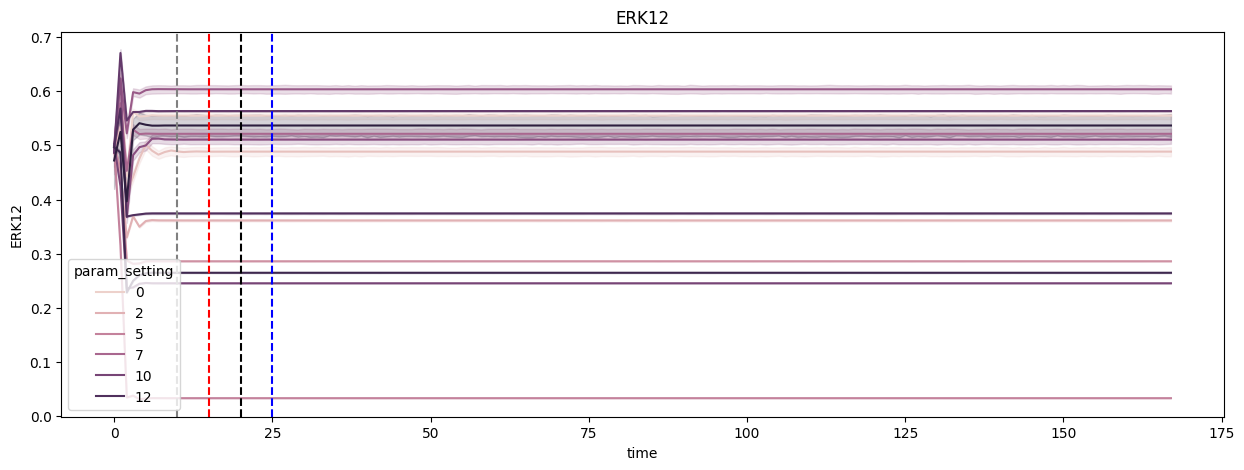

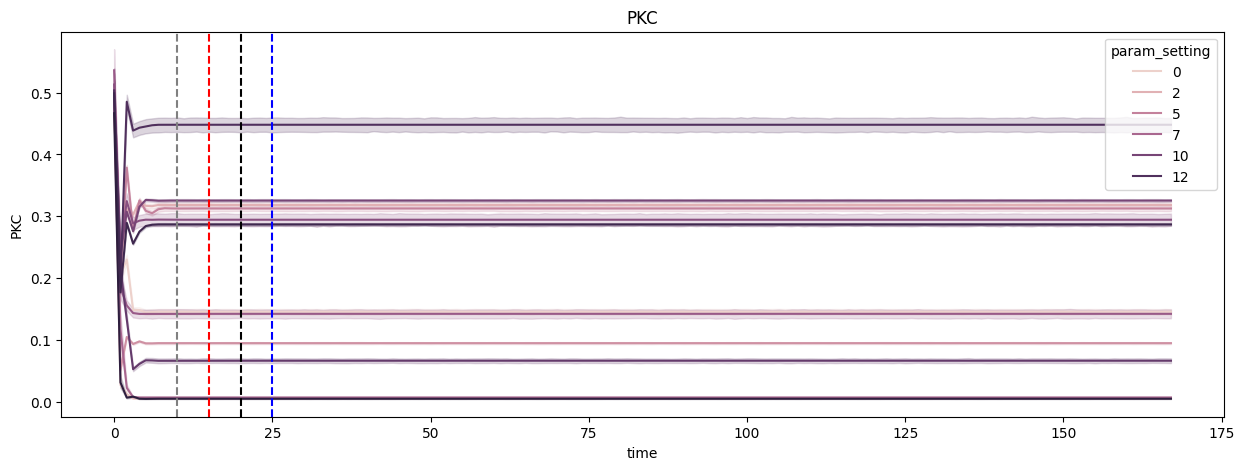

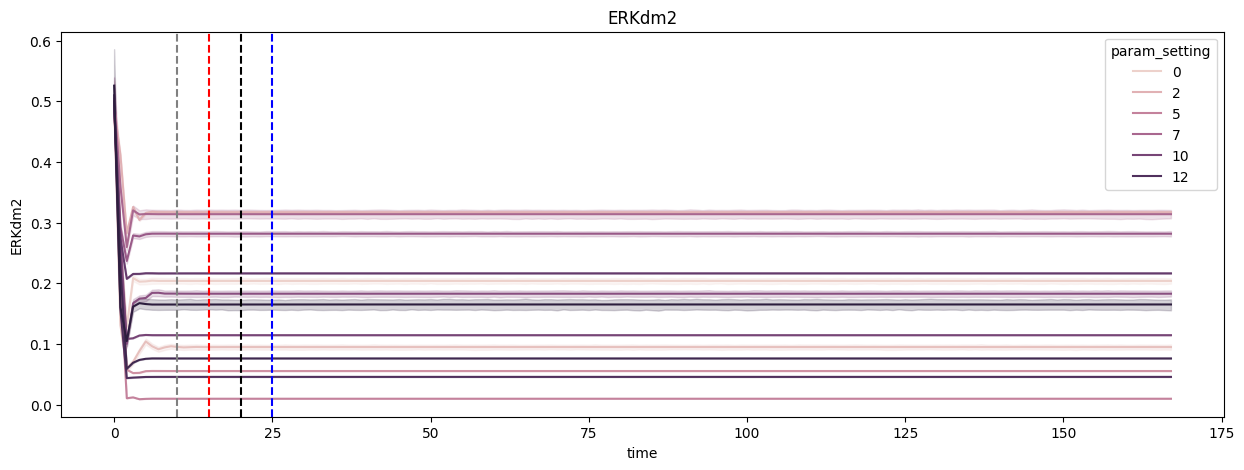

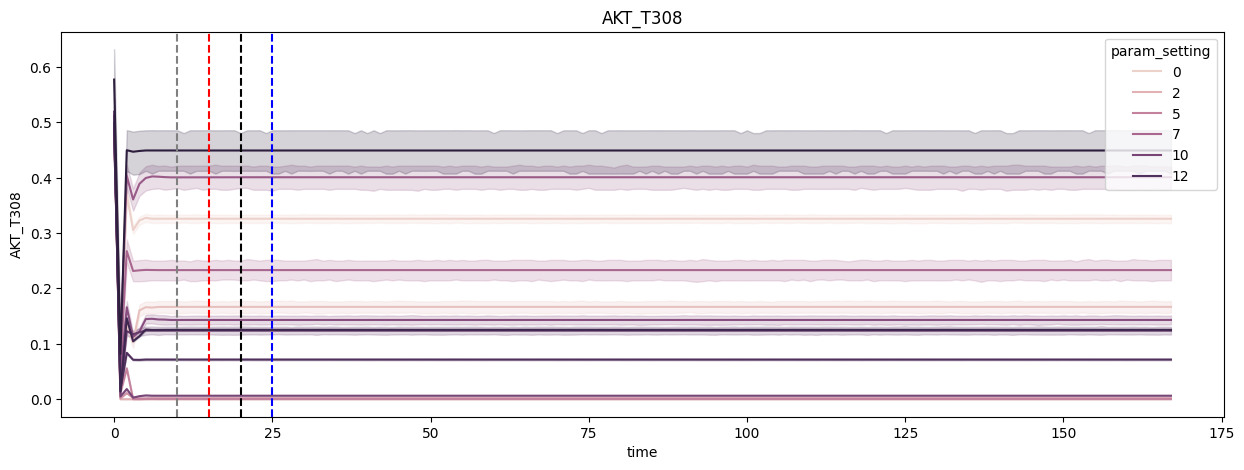

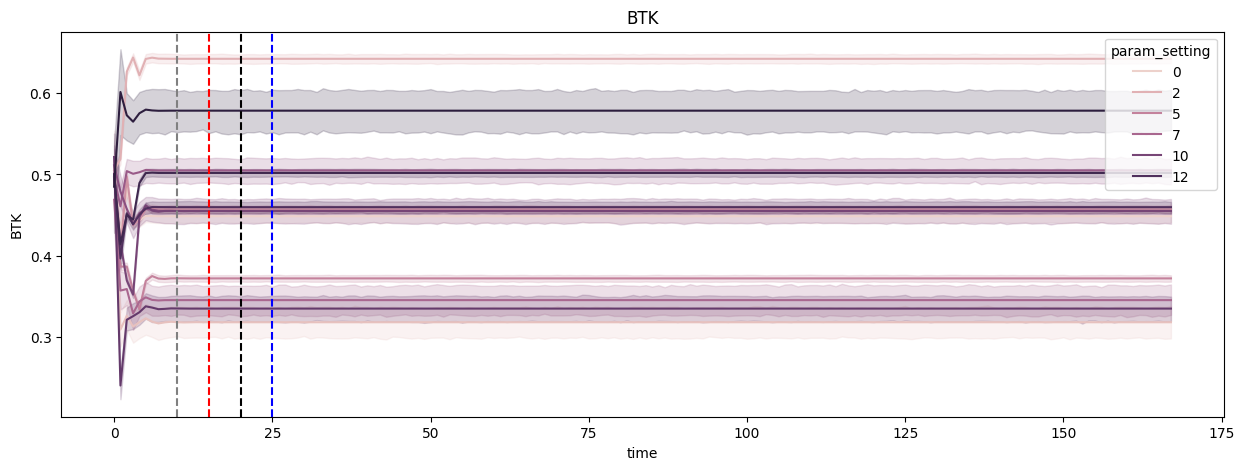

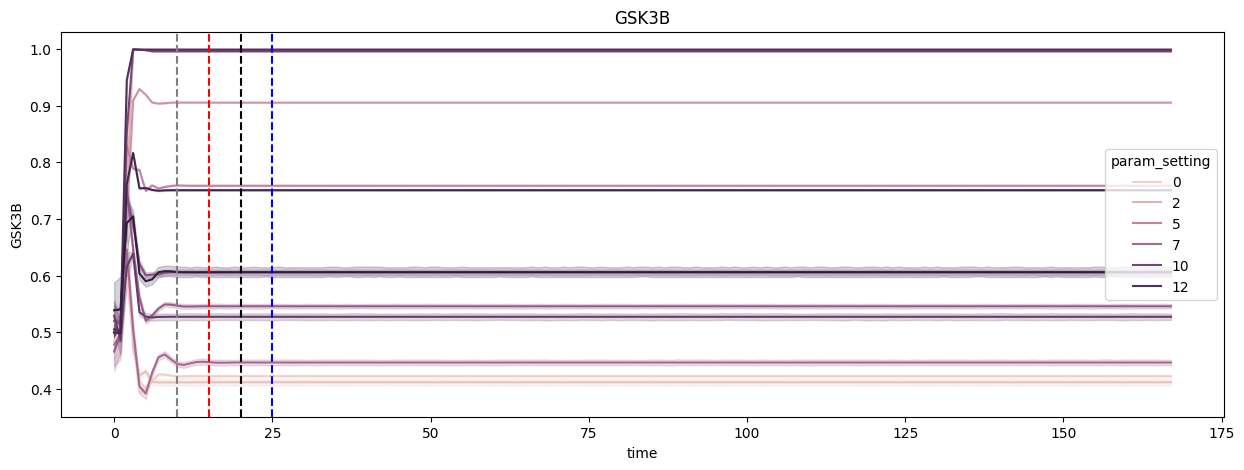

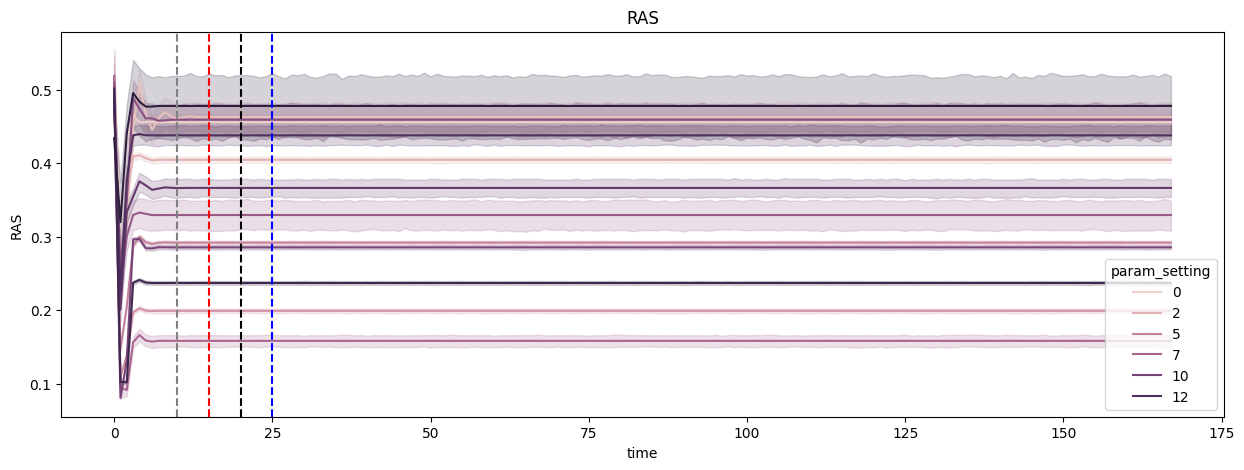

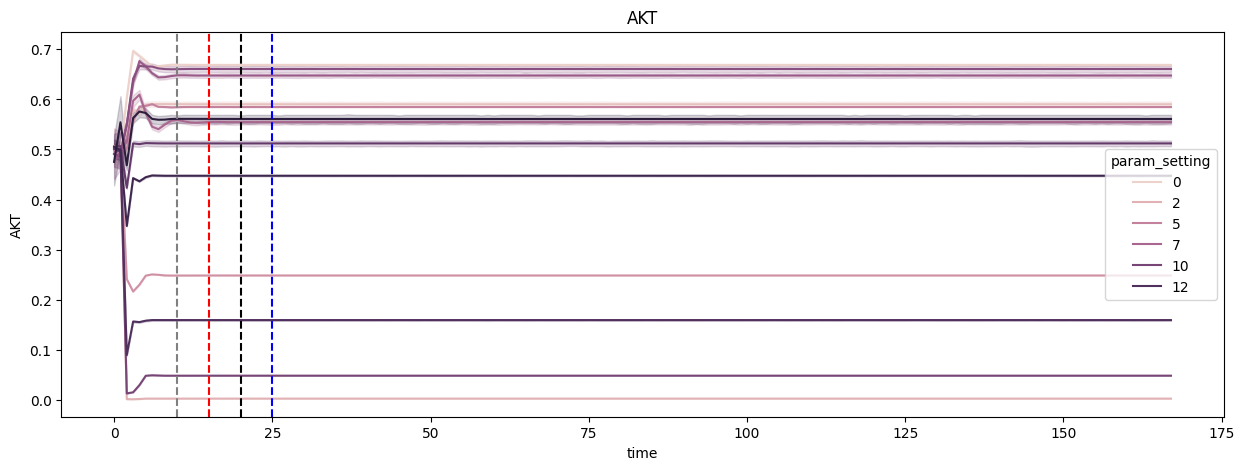

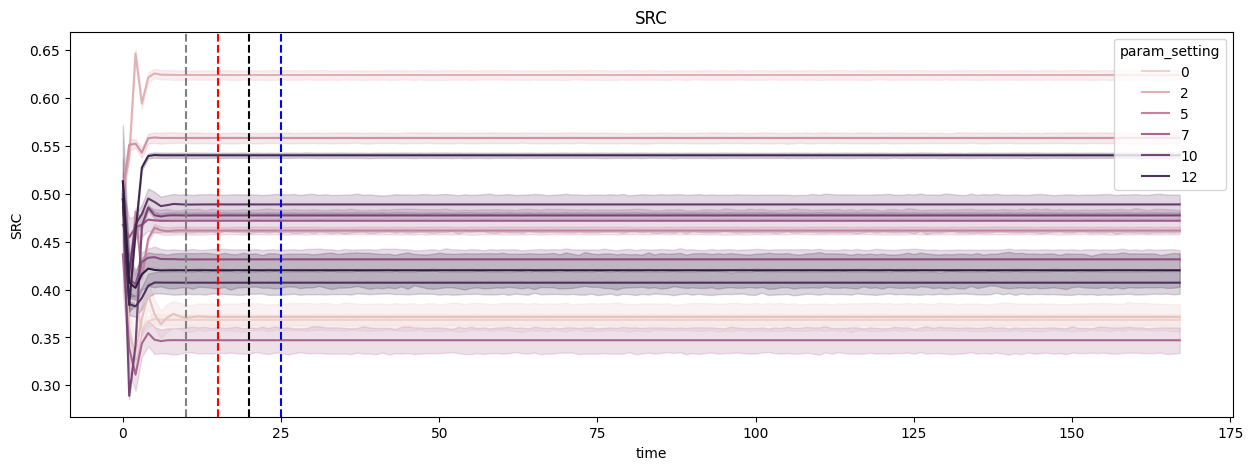

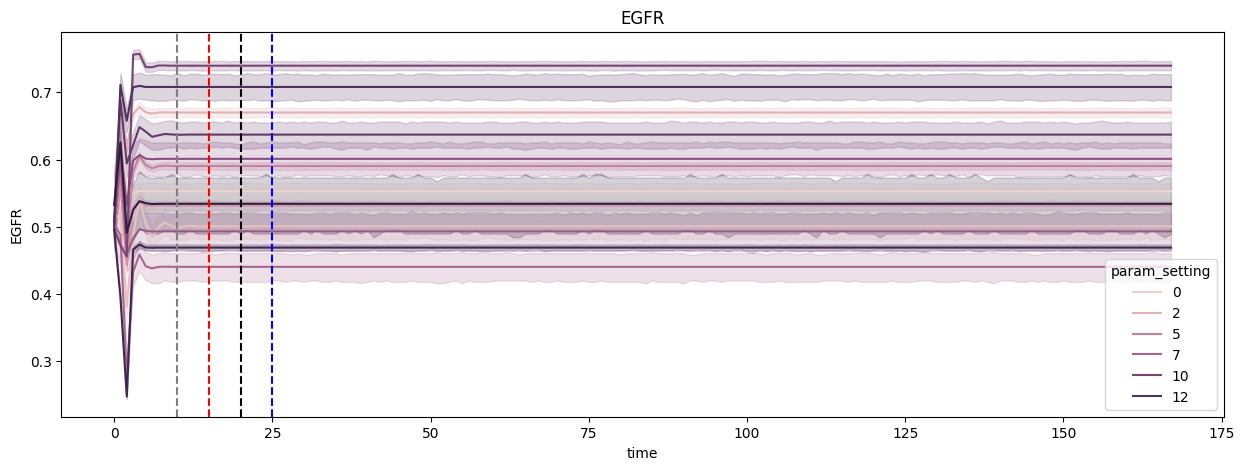

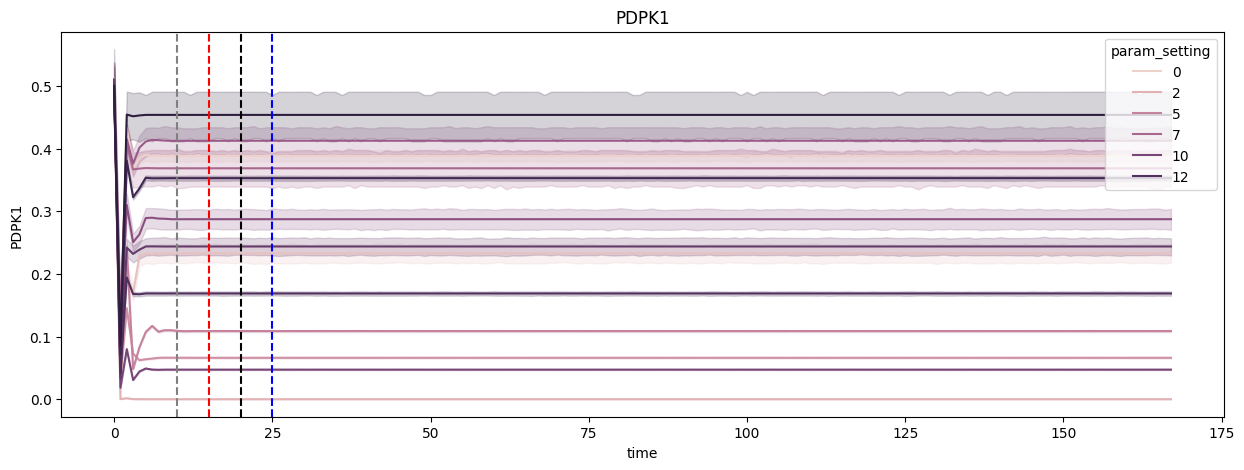

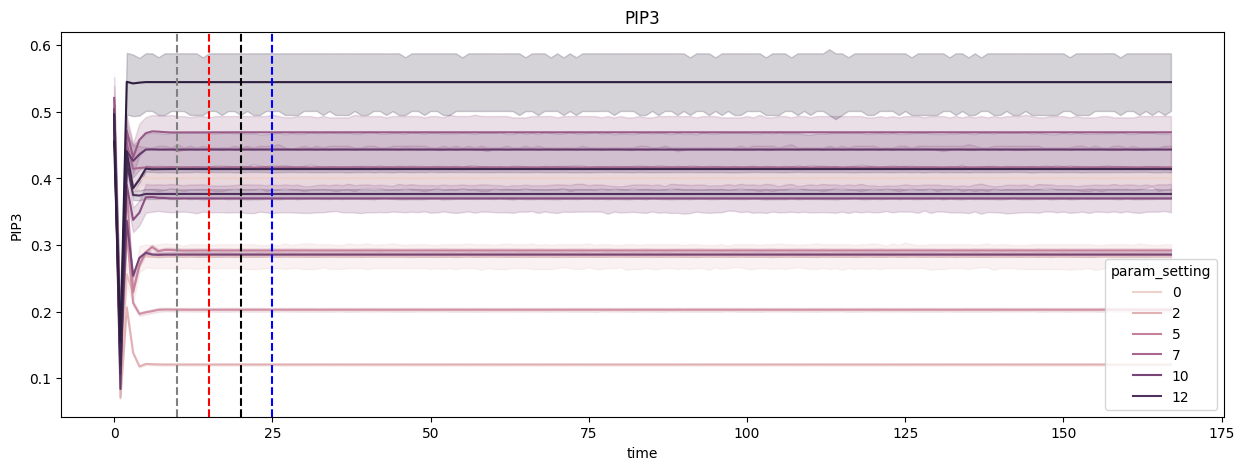

In [12]:
for node in loop_nodes:
    plt.figure(figsize=(15,5))
    sns.lineplot(all_loop_states, x="time", y=node, hue="param_setting")
    plt.axvline(x=10, linestyle="--", color="grey")
    plt.axvline(x=15, linestyle="--", color="red")
    plt.axvline(x=20, linestyle="--", color="black")
    plt.axvline(x=25, linestyle="--", color="blue")
    plt.title(node)
    plt.show()


In [ ]:
model.edges